<a href="https://colab.research.google.com/github/memo7499/challenge-alura-store/blob/main/Challenge_Alura_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Extracción de datos

##1. Importación de librerías y lectura de bases de datos

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


##2. Analizando la estructura de los datos

In [ ]:
for i, tienda in enumerate([tienda1, tienda2, tienda3, tienda4], start=1):
    print(f"\n--- Tienda {i} ---")
    print(tienda.info())
    print(tienda.head())


--- Tienda 1 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB
None
            Producto Categoría del Producto    Precio  Costo de 

#Análisis de datos

##1. Facturación

Calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.

In [ ]:
#Definimos una función para aplicar más fáclmente el cálculo del total de ventas por tienda
# y las ordenamos en una lista de mayor ingreso a menor junto con el promedio.

def suma_ventas(df):
    return {
        'Total_Ventas': df['Precio'].sum(),
        'Promedio_Ventas': df['Precio'].mean(),
    }

sumatorias = {
    'Tienda 1': suma_ventas(tienda1),
    'Tienda 2': suma_ventas(tienda2),
    'Tienda 3': suma_ventas(tienda3),
    'Tienda 4': suma_ventas(tienda4)
}

sumatorias_df = pd.DataFrame(sumatorias).T
print(sumatorias_df.to_string(formatters={'Total_Ventas': '{:.2f}'.format, 'Promedio_Ventas': '{:.2f}'.format}))

          Total_Ventas Promedio_Ventas
Tienda 1 1150880400.00       487867.91
Tienda 2 1116343500.00       473227.43
Tienda 3 1098019600.00       465459.77
Tienda 4 1038375700.00       440362.89


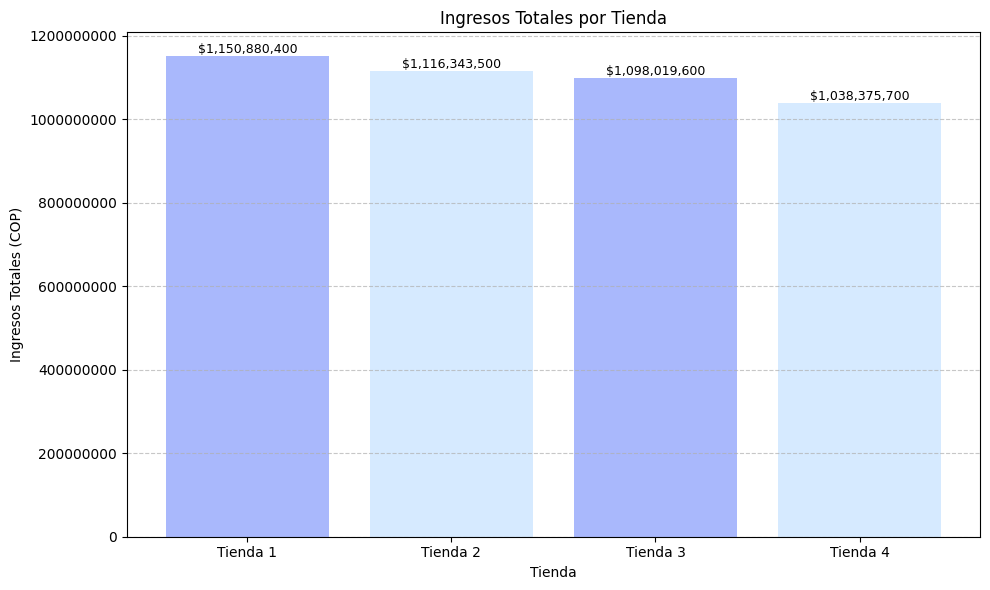

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming sumatorias_df is already defined from previous steps
plt.figure(figsize=(10, 6))
plt.bar(sumatorias_df.index, sumatorias_df['Total_Ventas'], color=['#A9B8FC', '#D6EAFF','#A9B8FC', '#D6EAFF'])
plt.title('Ingresos Totales por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ingresos Totales (COP)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add the exact value on top of each bar
for index, value in enumerate(sumatorias_df['Total_Ventas']):
    plt.text(index, value, f'${value:,.0f}', ha='center', va='bottom', fontsize=9)

plt.ticklabel_format(style='plain', axis='y') # Prevent scientific notation on y-axis
plt.tight_layout()
plt.show()

## 2. Ventas por categoría

Calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

In [ ]:
def ventas_por_categoria(df):
    return df.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False)

ventas_categorias = {
    'Tienda 1': ventas_por_categoria(tienda1),
    'Tienda 2': ventas_por_categoria(tienda2),
    'Tienda 3': ventas_por_categoria(tienda3),
    'Tienda 4': ventas_por_categoria(tienda4)
}

for tienda, ventas in ventas_categorias.items():
    print(f"\n--- Ventas por Categoría en {tienda} ---")
    print(ventas.to_string())


--- Ventas por Categoría en Tienda 1 ---
Categoría del Producto
Electrónicos               429493500.0
Electrodomésticos          363685200.0
Muebles                    187633700.0
Instrumentos musicales      91299000.0
Deportes y diversión        39290000.0
Juguetes                    17995700.0
Artículos para el hogar     12698400.0
Libros                       8784900.0

--- Ventas por Categoría en Tienda 2 ---
Categoría del Producto
Electrónicos               410831100.0
Electrodomésticos          348567800.0
Muebles                    176426300.0
Instrumentos musicales     104990300.0
Deportes y diversión        34744500.0
Juguetes                    15945400.0
Artículos para el hogar     14746900.0
Libros                      10091200.0

--- Ventas por Categoría en Tienda 3 ---
Categoría del Producto
Electrónicos               410775800.0
Electrodomésticos          329237900.0
Muebles                    201072100.0
Instrumentos musicales      77380900.0
Deportes y diversión     

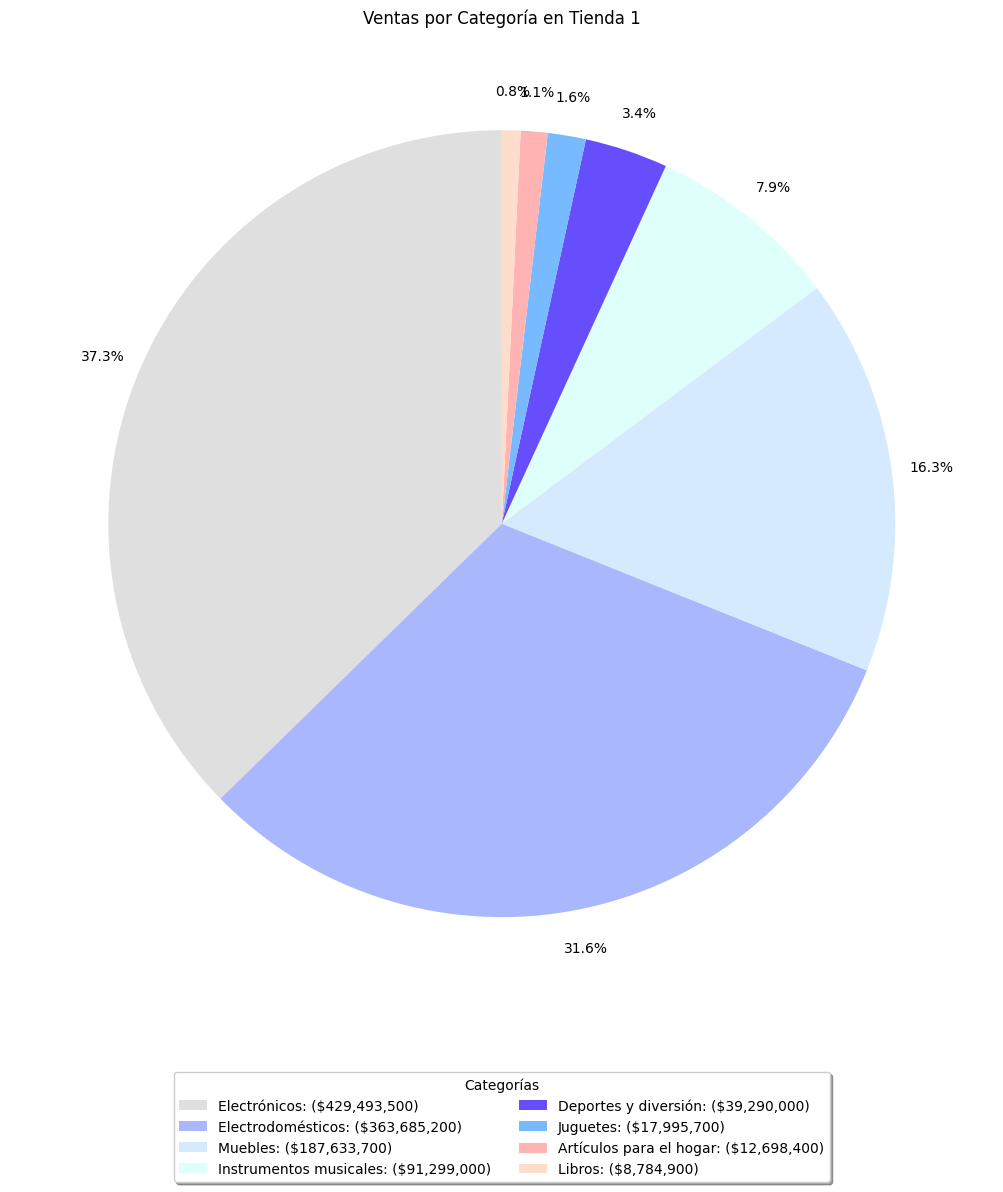

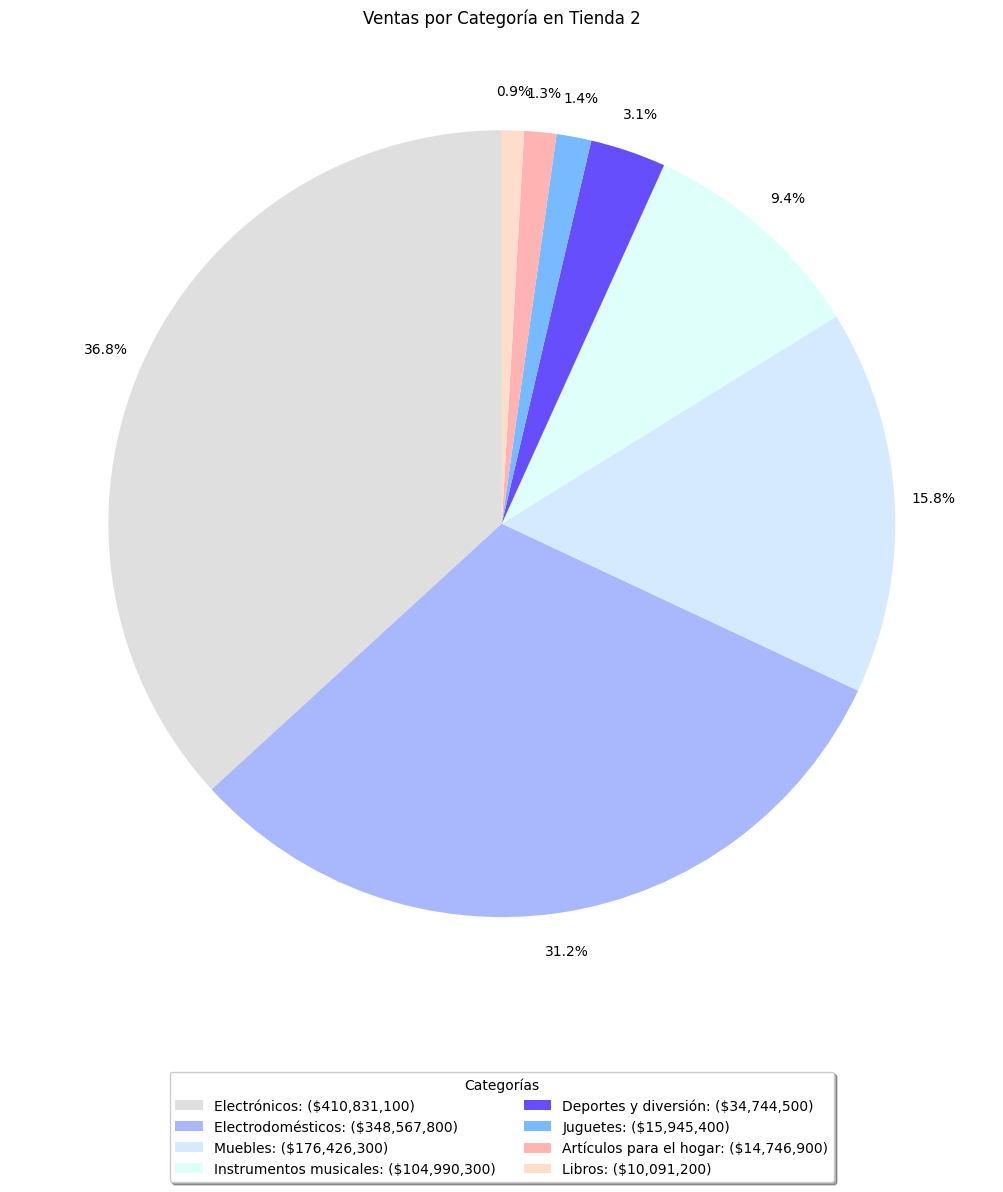

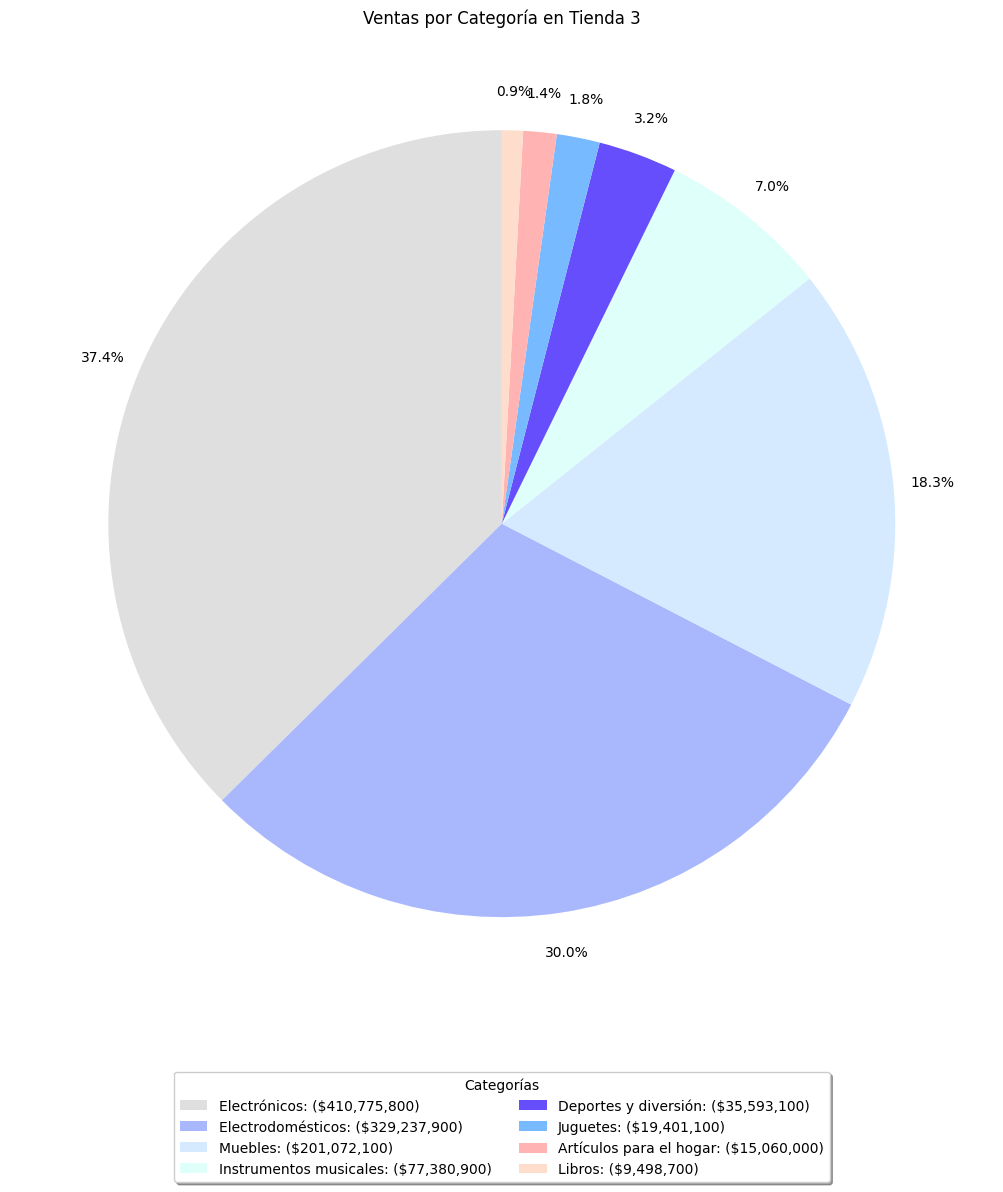

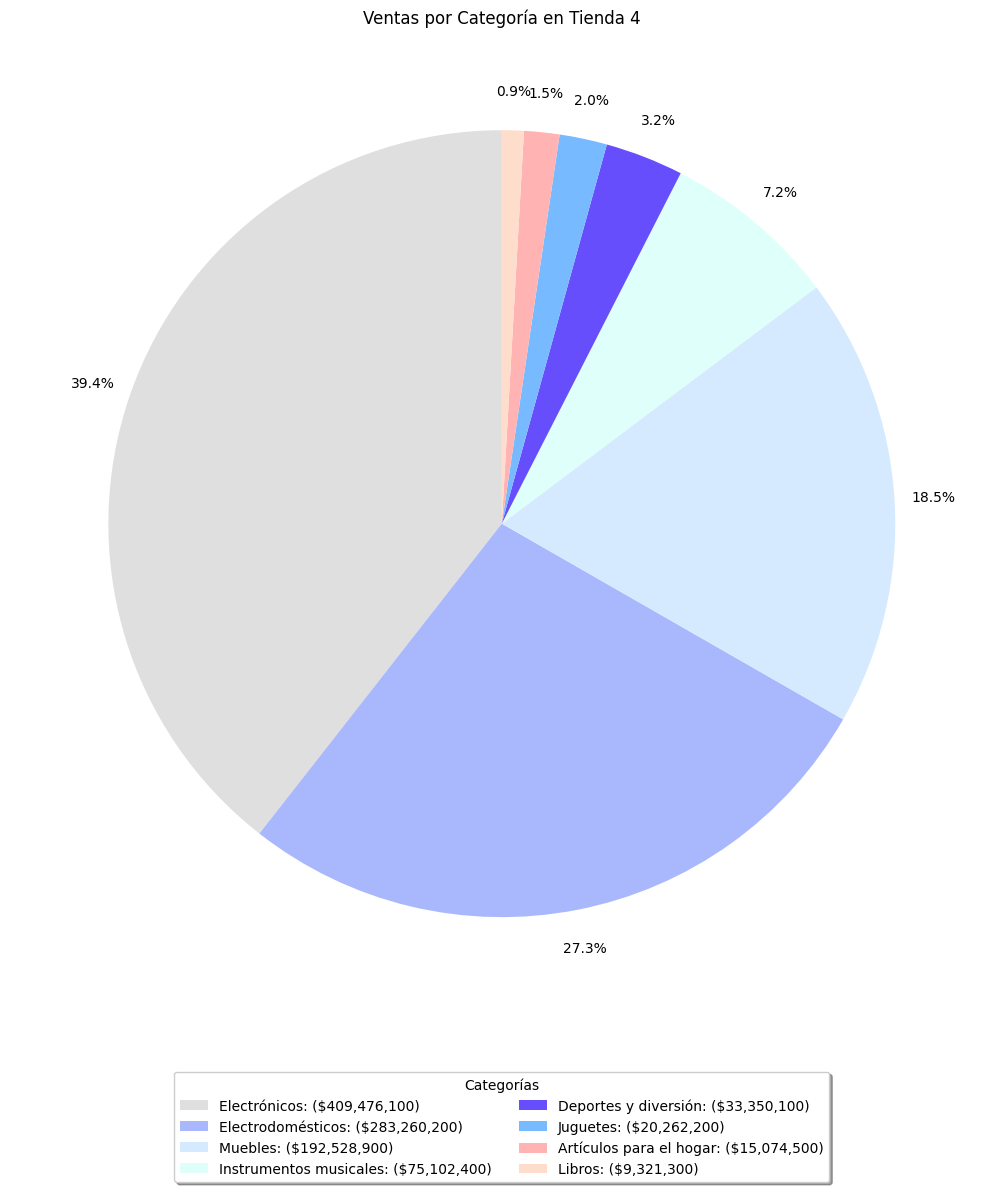

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#Definimos colores para la gráfica
colores_grafica = ['#DFDFDF', '#A9B8FC', '#D6EAFF', '#DFFFFB', '#674EFC', '#78BAFF', '#FFB3B3', '#FFDDCC']

#Ploteamos las ventas por categoría de cada tienda
for tienda, ventas in ventas_categorias.items():
    plt.figure(figsize=(12, 12))
    wedges, texts = plt.pie(ventas, startangle=90, colors=colores_grafica)
    plt.title(f'Ventas por Categoría en {tienda}')
#Escondemos la etiqueta del eje Y
    plt.ylabel('')

#Añdimos los porcentajes de ventas alrededor de la gráfica
    total = ventas.sum()
    for i, wedge in enumerate(wedges):
        angle = (wedge.theta2 + wedge.theta1) / 2.
        x = 1.1 * np.cos(np.deg2rad(angle))
        y = 1.1 * np.sin(np.deg2rad(angle))
        plt.text(x, y, f'{ventas.iloc[i]/total:.1%}', ha='center', va='center')

#Creamos y añadimos la anotación de categorías y la sumatoria de ventas
    legend_labels = [f'{label}: (${ventas.loc[label]:,.0f})' for label in ventas.index]
    plt.legend(wedges, legend_labels, title="Categorías", loc="upper center", bbox_to_anchor=(0.5, -0.05),
               fancybox=True, shadow=True, ncol=2)

    plt.tight_layout()
    plt.show()

## 3. Calificación promedio de la tienda

Calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

In [ ]:
def calificacion_promedio(df):
    return df['Calificación'].mean()

calificaciones_promedio = {
    'Tienda 1': calificacion_promedio(tienda1),
    'Tienda 2': calificacion_promedio(tienda2),
    'Tienda 3': calificacion_promedio(tienda3),
    'Tienda 4': calificacion_promedio(tienda4)
}

for tienda, calificacion in calificaciones_promedio.items():
    print(f"Calificación promedio en {tienda}: {calificacion:.2f}/5.00")

Calificación promedio en Tienda 1: 3.98/5.00
Calificación promedio en Tienda 2: 4.04/5.00
Calificación promedio en Tienda 3: 4.05/5.00
Calificación promedio en Tienda 4: 4.00/5.00


In [ ]:
#Añdimos los datos a un df
calificaciones_df = pd.DataFrame.from_dict(calificaciones_promedio, orient='index', columns=['Calificación'])
calificaciones_df.index.name = 'Tienda'
display(calificaciones_df.style.format({'Calificación': '{:.2f}'}))

,Calificación
Tienda,
Tienda 1,3.98
Tienda 2,4.04
Tienda 3,4.05
Tienda 4,4.00


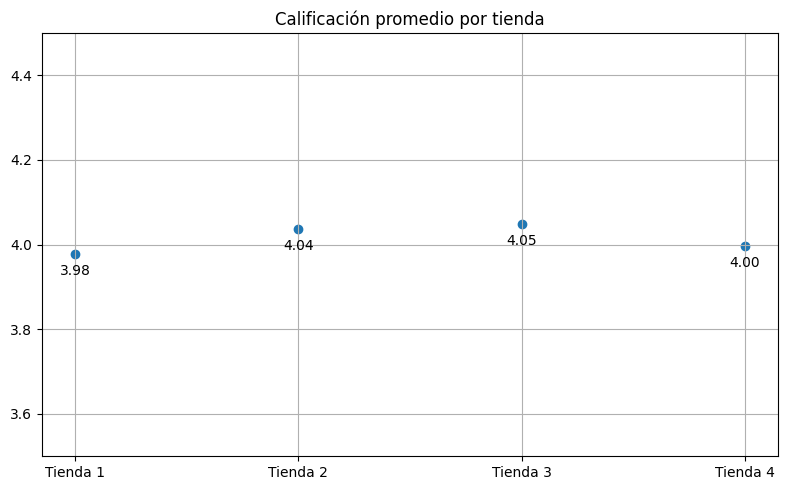

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

#Convertimos los diccionarios a series
calificaciones_series = pd.Series(calificaciones_promedio)

plt.figure(figsize=(8, 5))
plt.scatter(calificaciones_series.index, calificaciones_series.values)
plt.title('Calificación promedio por tienda')
#Ajustamos el eje Y para ver diferencias entre las calificaciones
plt.ylim(3.5, 4.5)
plt.grid(True)
plt.tight_layout()
#Añadimos la puntuación debajo de cada punto
for i, txt in enumerate(calificaciones_series.values):
    plt.annotate(f'{txt:.2f}', (calificaciones_series.index[i], calificaciones_series.values[i]), textcoords="offset points", xytext=(0,-15), ha='center')
plt.show()

## 4. Productos más y menos vendidos

Identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

In [ ]:
import pandas as pd

def productos_mas_vendidos(df):
    return df['Producto'].value_counts().head(1).reset_index(name='Cantidad Vendida').rename(columns={'index': 'Producto'})

def productos_menos_vendidos(df):
    return df['Producto'].value_counts().tail(1).reset_index(name='Cantidad Vendida').rename(columns={'index': 'Producto'})

tiendas = {
    'Tienda 1': tienda1,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

# Store most and least sold products in individual dataframes for each store
mas_vendidos_tienda1_df = productos_mas_vendidos(tienda1)
menos_vendidos_tienda1_df = productos_menos_vendidos(tienda1)
mas_vendidos_tienda2_df = productos_mas_vendidos(tienda2)
menos_vendidos_tienda2_df = productos_menos_vendidos(tienda2)
mas_vendidos_tienda3_df = productos_mas_vendidos(tienda3)
menos_vendidos_tienda3_df = productos_menos_vendidos(tienda3)
mas_vendidos_tienda4_df = productos_mas_vendidos(tienda4)
menos_vendidos_tienda4_df = productos_menos_vendidos(tienda4)


# Display the results
for nombre, df in tiendas.items():
    mas_vendidos_df = productos_mas_vendidos(df)
    menos_vendidos_df = productos_menos_vendidos(df)
    print(f"\n--- Productos más vendidos en {nombre} ---")
    display(mas_vendidos_df)
    print(f"\n--- Productos menos vendidos en {nombre} ---")
    display(menos_vendidos_df)


--- Productos más vendidos en Tienda 1 ---


,Producto,Cantidad Vendida
0,Microondas,60



--- Productos menos vendidos en Tienda 1 ---


,Producto,Cantidad Vendida
0,Celular ABXY,33



--- Productos más vendidos en Tienda 2 ---


,Producto,Cantidad Vendida
0,Iniciando en programación,65



--- Productos menos vendidos en Tienda 2 ---


,Producto,Cantidad Vendida
0,Juego de mesa,32



--- Productos más vendidos en Tienda 3 ---


,Producto,Cantidad Vendida
0,Kit de bancas,57



--- Productos menos vendidos en Tienda 3 ---


,Producto,Cantidad Vendida
0,Bloques de construcción,35



--- Productos más vendidos en Tienda 4 ---


,Producto,Cantidad Vendida
0,Cama box,62



--- Productos menos vendidos en Tienda 4 ---


,Producto,Cantidad Vendida
0,Guitarra eléctrica,33


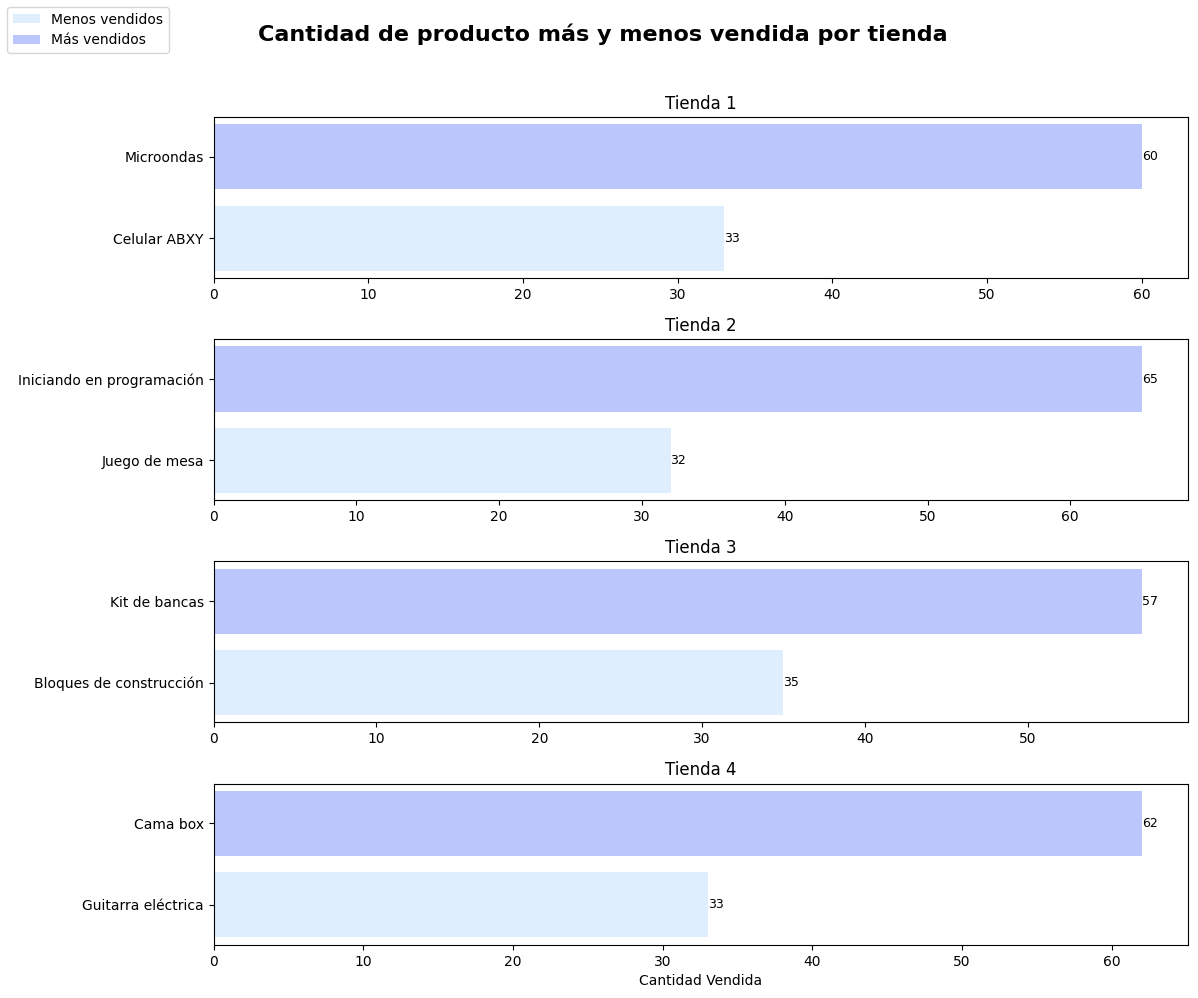

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fig3, productos= plt.subplots(4,1, figsize=(12,10))
fig3.suptitle('Cantidad de producto más y menos vendida por tienda', fontsize = 16, fontweight='bold')

productos[0].barh(menos_vendidos_tienda1_df['Producto'], menos_vendidos_tienda1_df['Cantidad Vendida'], color='#D6EAFF', alpha=0.8)
productos[0].barh(mas_vendidos_tienda1_df['Producto'], mas_vendidos_tienda1_df['Cantidad Vendida'], color='#A9B8FC', alpha=0.8)
productos[0].set_title('Tienda 1')

productos[1].barh(menos_vendidos_tienda2_df['Producto'], menos_vendidos_tienda2_df['Cantidad Vendida'], color='#D6EAFF', alpha=0.8)
productos[1].barh(mas_vendidos_tienda2_df['Producto'], mas_vendidos_tienda2_df['Cantidad Vendida'], color='#A9B8FC', alpha=0.8)
productos[1].set_title('Tienda 2')

productos[2].barh(menos_vendidos_tienda3_df['Producto'], menos_vendidos_tienda3_df['Cantidad Vendida'], color='#D6EAFF', alpha=0.8)
productos[2].barh(mas_vendidos_tienda3_df['Producto'], mas_vendidos_tienda3_df['Cantidad Vendida'], color='#A9B8FC', alpha=0.8)
productos[2].set_title('Tienda 3')

productos[3].barh(menos_vendidos_tienda4_df['Producto'], menos_vendidos_tienda4_df['Cantidad Vendida'], color='#D6EAFF', alpha=0.8)
productos[3].barh(mas_vendidos_tienda4_df['Producto'], mas_vendidos_tienda4_df['Cantidad Vendida'], color='#A9B8FC', alpha=0.8)
productos[3].set_title('Tienda 4')
productos[3].set_xlabel('Cantidad Vendida')

for ax in productos:
  for bars in ax.containers:
    ax.bar_label(bars,fmt='%.0f',label_type='edge',fontsize=9)


fig3.legend(['Menos vendidos', 'Más vendidos'], loc='upper left')
plt.tight_layout(rect=[0,0,1,0.96]) # Para ajustar la imagen y que no se superpongan elementos
plt.show() # Added to display the plot

## 5. Envío promedio por tienda

Calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.  Sabiendo que el cliente paga el envío.

In [ ]:
def costo_envio_promedio(df):
    return df['Costo de envío'].mean()

costos_envio_promedio = {
    'Tienda 1': costo_envio_promedio(tienda1),
    'Tienda 2': costo_envio_promedio(tienda2),
    'Tienda 3': costo_envio_promedio(tienda3),
    'Tienda 4': costo_envio_promedio(tienda4)
}

for tienda, costo in costos_envio_promedio.items():
    print(f"Costo de envío promedio en {tienda}: {costo:.2f}")

Costo de envío promedio en Tienda 1: 26018.61
Costo de envío promedio en Tienda 2: 25216.24
Costo de envío promedio en Tienda 3: 24805.68
Costo de envío promedio en Tienda 4: 23459.46


In [ ]:
#Añdimos los datos a un df
costo_envio_promedio_df = pd.DataFrame.from_dict(costos_envio_promedio, orient='index', columns=['Costo de envío promedio'])
display(costo_envio_promedio_df.style.format({'Costo de envío promedio': '{:.2f}'}))

,Costo de envío promedio
Tienda 1,26018.61
Tienda 2,25216.24
Tienda 3,24805.68
Tienda 4,23459.46


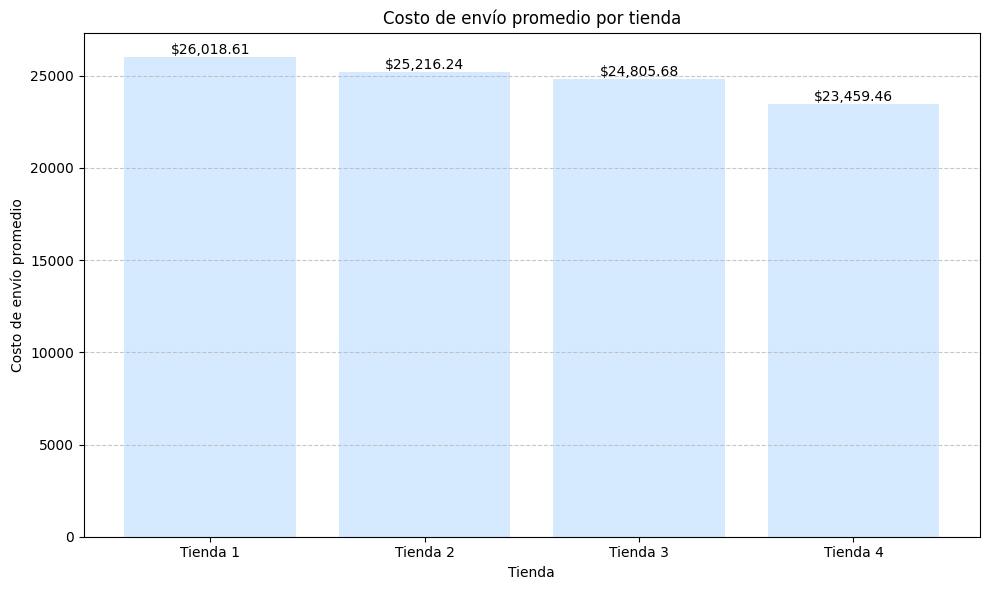

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(costo_envio_promedio_df.index, costo_envio_promedio_df['Costo de envío promedio'], color='#D6EAFF')
plt.title('Costo de envío promedio por tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo de envío promedio')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for index, value in enumerate(costo_envio_promedio_df['Costo de envío promedio']):
    plt.text(index, value, f'${value:,.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

##6. Visualización en mapas

In [ ]:
import folium
from folium.plugins import HeatMap

#Cmbinamos los df de todas la tiendas en uno solo
all_stores_df = pd.concat([tienda1, tienda2, tienda3, tienda4])

#Añadimos las ventas por coordenadas(lat y lon)
location_sales = all_stores_df.groupby(['lat', 'lon'])['Precio'].sum().reset_index()

#Creamos una lista de [latitud, longitud, Precios] para el heatmap
heat_data = [[row['lat'], row['lon'], row['Precio']] for index, row in location_sales.iterrows()]

#Calculamos las coordenadas promedio para centrar el mapa
mean_lat = all_stores_df['lat'].mean()
mean_lon = all_stores_df['lon'].mean()

#Creamos el mapa usando Folium
m = folium.Map(location=[mean_lat, mean_lon], zoom_start=6)

#Añadimps los rastros de calor sobre el mapa
HeatMap(heat_data).add_to(m)


display(m)

### Interpretación del Mapa de Calor de Ventas por Ubicación Geográfica

El mapa de calor nos permite identificar visualmente las áreas con la mayor concentración de ventas y diferente información, por ejemplo:

1.  **Identificar Áreas con Mayor Concentración de Ventas:**
    *   Las zonas con colores más intensos representan las ubicaciones geográficas donde se han registrado los mayores volúmenes de ventas.

2.  **Explorar el Rendimiento de las Tiendas en Regiones Específicas:**
    *   Aunque el mapa de calor muestra la concentración general de ventas y no la ubicación exacta de cada tienda con un marcador individual, podemos correlacionar las zonas de alta concentración de ventas con las ciudades donde tus tiendas están ubicadas.
    *   Si una tienda se encuentra en una región con un punto caliente en el mapa, es probable que esté rindiendo bien. Si, por el contrario, una tienda está en una región con baja intensidad en el mapa de calor, podría indicar un rendimiento inferior al esperado en esa área, o que hay un potencial de crecimiento no explotado.
    *   Puedes usar los datos de `Lugar de Compra` y compararlos con las concentraciones del mapa para hacer inferencias sobre el rendimiento de tiendas en ciudades específicas (por ejemplo, Bogotá, Medellín, Cali).

3.  **Identificar Patrones Geográficos que Influyen en el Rendimiento:**
    *   Observe si las áreas de alta o baja concentración de ventas siguen algún patrón geográfico específico. Por ejemplo, ¿las ventas son más altas en las capitales, en zonas costeras, o en el interior del país?
    *   ¿Existen clústeres de ventas fuertes en áreas urbanas densamente pobladas? ¿O quizás las ventas son más dispersas en regiones rurales?
    *   Estos patrones pueden darte pistas sobre factores externos (demografía, competencia, infraestructura, poder adquisitivo) que podrían estar influyendo en el éxito o el desafío de tus tiendas en diferentes lugares. Por ejemplo, si una ciudad tiene alta densidad de ventas en el mapa, pero una de tus tiendas allí no está en los top de ventas, podría ser una oportunidad para mejorar la estrategia de esa tienda.

Sr. Juan, al analizar el mapa de calor junto con los datos sobre la ubicación de las tiendas y el mercado local, podrás obtener una comprensión más profunda de la relación entre la geografía y el rendimiento de tus ventas.

# Resultados


##1. Justificación

Una vez habiendo hecho la extracción, trabajo y análisis de los datos sobre la facturación total, popularidad de categorías, evaluación promedio de clientes, productos más y menos vendidos, y costos de envío en las 4 tinedas de Sr. Juan, tenemos la información necesaria para tomar una decisión inteligente basada en datos.

📊 Datos clave:

- **Tienda 1**: Es la #1 en facturación. Tiene los ingresos más altos (\$1,150,880.400 COP), pero obtiene la calificación promedio más baja de todas (3.98⭐), además de ser el costo de envío promedio más alto.
- **Tienda 2**: Es la más estable de las 4. Obtiene buenos ingresos y una buena satisfacción al cliente, representa una buena inversión a largo plazo.
- **Tienda 3**: Tiene la mejor satisfacción al cliente (4.05⭐), buena diversificación de ventas en sus productos, con un área de mejora amplia en la cantidad de sus ingresos.
- **Tienda 4**: Es la que menos facturación obtiene de las 4 (\$1,038,375,700 COP), no presenta una satisfacción al cliente tan alta ni y una diversificación de compras entre categorías alta.

#2. Conclusiones

Después de realizar el análisis de la situación actual de las tiendas, tenemos como resultado un buen negocio entre las 4 tinedas, sin embargo, al estar buscando una expansión en un nuevo emprendimiento y quqerer vender una de las 4 sucursales, tenemos las siguientes recomendaciones:

1. Se recomeinda que la principal tienda para ser vendida sea la **Tienda 4**, ya que es la menos rentable en términos generales, y no representa un aporte económico esperado.
2. Invertir a largo plazo en la **Tienda 2** por su estabilidad y rentabilidad.
3. Identificar los factores de éxito de la **Tienda 1** y ver la viabilidad se ser replicados en las demás sucursales.
4. Promocionar los mejores productos para atraer más público y mejorar los ingresos manteneindo el buen servicio al cliente en la **Tienda**.